/home/kh/app/anaconda3/envs/llm/lib/python3.10/site-packages/sklearn/datasets/_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name vehicle exist. Versions may be fundamentally different, returning version 1.
  warn(
/home/kh/app/anaconda3/envs/llm/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/home/kh/app/anaconda3/envs/llm/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(

<bound method NDFrame.head of      COMPACTNESS  CIRCULARITY  DISTANCE_CIRCULARITY  RADIUS_RATIO  \
0           95.0         48.0                  83.0         178.0   
1           91.0         41.0                  84.0         141.0   
2          104.0         50.0                 106.0         209.0   
3           93.0         41.0                  82.0         159.0   
4           85.0         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841         93.0         39.0                  87.0         183.0   
842         89.0         46.0                  84.0         163.0   
843        106.0         54.0                 101.0         222.0   
844         86.0         36.0                  78.0         146.0   
845         85.0         36.0                  66.0         123.0   

     PR.AXIS_ASPECT_RATIO  MAX.LENGTH_ASPECT_RATIO  SCATTER_RATIO  \
0                    72.0                     10.0          162.0   
1  

ValueError: cannot reshape array of size 9 into shape (5,2)

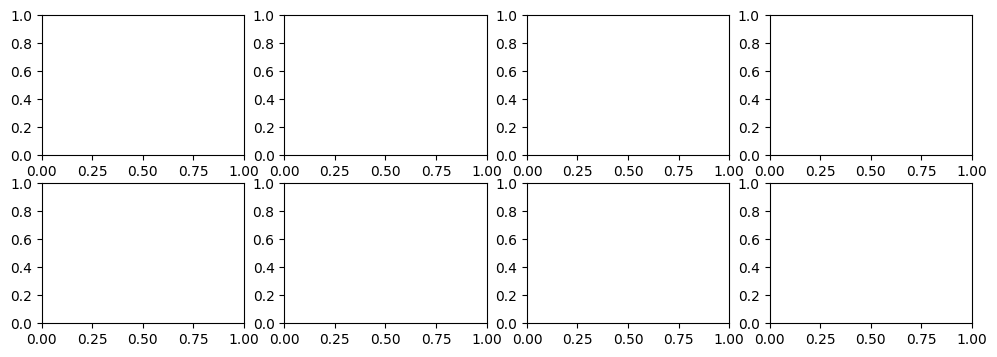

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import fetch_openml

# Load the Statlog Vehicle dataset
vehicle = fetch_openml("vehicle")
X = vehicle.data
print(X.head)
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Perform Expectation Maximization (EM) clustering with Gaussian Mixture Model
em = GaussianMixture(n_components=4, random_state=0)
em.fit(X)

# Visualize the results
fig, axes = plt.subplots(2, 4, figsize=(12, 4))
for i in range(4):
    cluster_center_kmeans = kmeans.cluster_centers_[i][:9].reshape(3,3)  # Adjust the dimensions
    cluster_center_em = em.means_[i][:9].reshape(3,3)  # Adjust the dimensions
    
    axes[0, i].imshow(cluster_center_kmeans, cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Cluster {i} (K-Means)')
    
    axes[1, i].imshow(cluster_center_em, cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Cluster {i} (EM)')

plt.show()


<bound method NDFrame.head of          140.5625  55.68378214  -0.234571412  -0.699648398  3.199832776  \
0      102.507812    58.882430      0.465318     -0.515088     1.677258   
1      103.015625    39.341649      0.323328      1.051164     3.121237   
2      136.750000    57.178449     -0.068415     -0.636238     3.642977   
3       88.726562    40.672225      0.600866      1.123492     1.178930   
4       93.570312    46.698114      0.531905      0.416721     1.636288   
...           ...          ...           ...           ...          ...   
17892  136.429688    59.847421     -0.187846     -0.738123     1.296823   
17893  122.554688    49.485605      0.127978      0.323061    16.409699   
17894  119.335938    59.935939      0.159363     -0.743025    21.430602   
17895  114.507812    53.902400      0.201161     -0.024789     1.946488   
17896   57.062500    85.797340      1.406391      0.089520   188.306020   

       19.11042633  7.975531794  74.24222492  0  
0        14.860146 

/home/kh/app/anaconda3/envs/llm/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


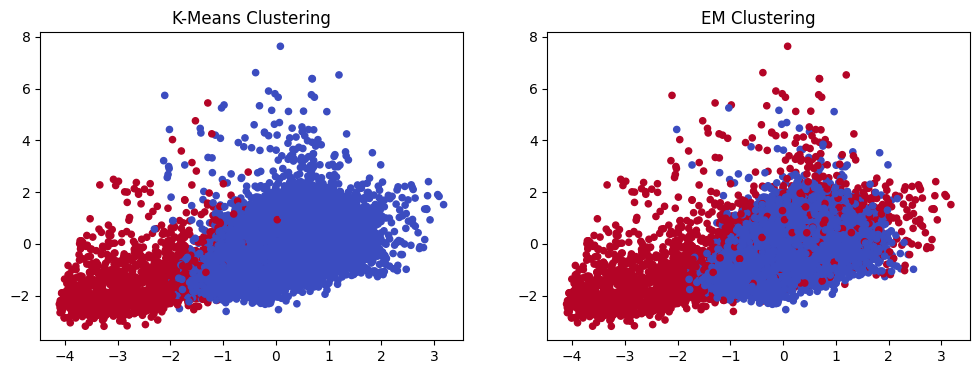

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler 
import pandas as pd
# Load the HTRU2 Pulsar dataset
data = pd.read_csv("./data/HTRU_2.csv")
X = data
print(X.head)
# Standardize the data (important for K-Means and EM)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_std)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

# Perform Expectation Maximization (EM) clustering with Gaussian Mixture Model
em = GaussianMixture(n_components=2, random_state=0)
em.fit(X_std)

# Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Visualize data with K-Means clustering
axes[0].scatter(X_std[:, 0], X_std[:, 1], c=kmeans.labels_, cmap='coolwarm', s=20)
axes[0].set_title('K-Means Clustering')

# Visualize data with EM clustering
axes[1].scatter(X_std[:, 0], X_std[:, 1], c=em.predict(X_std), cmap='coolwarm', s=20)
axes[1].set_title('EM Clustering')

plt.show()